<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/01_Calculo/03_Limites/01_Limites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Límites
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME 

*   Autores: 
    - Ingrid Pamela Ruiz Puga
    - Luis M. de la Cruz Salas
*   Rev: mar nov 10 19:06:45 CDT 2020

Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

## Introducción


In [ ]:
!git clone https://github.com/jugernaut/Prometeo.git
import os
import Prometeo.Utils.gutils as vis
from sympy import limit, Symbol, oo
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Cloning into 'Prometeo'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 2177 (delta 52), reused 0 (delta 0), pack-reused 2065
Receiving objects: 100% (2177/2177), 13.20 MiB | 7.80 MiB/s, done.
Resolving deltas: 100% (1377/1377), done.


### Emprendiendo con Chilaquiles 3.0

Un profesor, que se convirtió en cliente de los estudiantes emprendedores con chilaquiles, se interesó en ver cómo avanzó el negocio. Los estudiantes compartieron con el profesor el modelo con el que describieron sus ventas, el cual se escribe como sigue: 

$$ f(x) = \left\{
\begin{array}{l}
      \frac{30}{0.5 + e^{-(x-3.5)}} & x \leq 12 \\
      \\
      e^{0.2 x} + 120 & x \geq 12 \\
\end{array} 
\right.$$

Al mirar este modelo, el profesor se dió cuenta de la inconsistencia para $x = 12$, así que decidió resaltar esto en la siguiente visualización:

In [ ]:
# LINUX y MACOS
#%run "./03_Limites/02_Limites_interactive.ipynb"

# WINDOWS
#%run "D:\\GitSites\\PAPIME_PE101019_Materiales\\01_Calculo\\03_Limites/02_Limites_interactive.ipynb"

# Google Coolab
%run "/content/Prometeo/01_Calculo/03_Limites/02_Limites_interactive.ipynb"

Cloning into 'Prueba_lectura'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


interactive(children=(IntSlider(value=0, description='Límite $^-$', max=12), IntSlider(value=20, description='…

<function __main__.limiteChilaquil>

Observamos que cuando movemos el límite izquierdo (Límite $^-$) desde 0 hasta 12, el valor del modelo tiende a 60, mientras que si movemos el límite derecho (Límite $^+$) desde 20 hasta 12, el valor del modelo tiende a 131. Cuando $x=2$ se tienen dos valores!. Existe una discontinuidad. El modelo no cumple con la definición de función.

Usar límites, por la izquierda y por la derecha, nos puede ayudar a percatarnos de este tipo de inconsistencias, pero también para resolver distintos tipos de problemas. 

Veamos algunas definiciones importantes.

## Noción y definición de límite

El matemático francés Augustine Louis Cauchy (1789-1857) fue el primero en desarrollar una definición rigurosa de límite (aunque ya era usado este concepto desde los antigüos griegos para el cálculo de áreas) de la siguiente manera:

*Cuando los valores atribuidos sucesivamente a una variable se aproximan indefinidamente a un valor fijo para llegar por último a diferir de ese valor en una cantidad tan pequeña como se desee, entonces dicho valor fijo recibe el nombre de límite de todos los demás valores.*

En palabras más llanas decimos que: el límite de una función $f(x)$ en el punto $x_0$, es obtener el valor al que se va aproximando dicha función cuando $x$ tiende a $x_0$, pero sin llegar a ese punto, pues puede ser que $f(x_0)$ no esté definida en ese punto; durante este proceso nos vamos fijando en los valores que toma $f(x)$ para *puntos extremadamente cercanos* a $x_0$.

La sintaxis matemática del límite es:

$$\displaystyle \lim_{x \to x_0} f(x) = L $$

donde $L$ es el valor del límite.

Para aclarar lo anterior veamos un primer ejemplo:

### Ejemplo 1

¿Cuál es el límite de la función $f(x) = x^2 + 2x +1$ cuando $x$ tiende a 2?

Checa la siguiente gráfica:

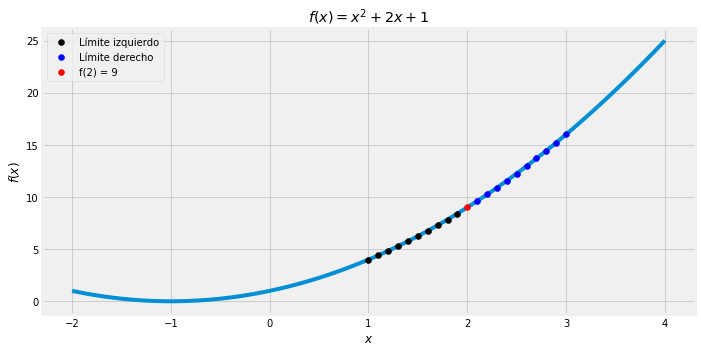

In [ ]:
#Definimos la función f(x)
f = lambda x: x**2 + 2*x + 1

#Definimos el dominio y el codominio de la función f(x)
x = np.linspace(-2,4,100) # Dominio
y = f(x)                  # Codiminio

#Definimos espacio de los puntos para límite izquierdo y derecho
pxi = np.arange(1,2,0.1)
pyi = f(pxi)

pxd = np.arange(3,2,-0.1)
pyd = f(pxd)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':'$f(x)=x^2 + 2x + 1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x))       #Gráfica de la función
graf.scatter(x=pxi, y=pyi,   #Gráfica del límite izquierdo
             par={'label':'Límite izquierdo','color':'black', 'zorder':5})
graf.scatter(x=pxd, y=pyd,   #Gráfica del límite derecho
             par={'label':'Límite derecho','color':'blue', 'zorder':5})
graf.scatter(x=2, y=f(2),    #Gráfica del límite
             par={'label':'f(2) = {}'.format(f(2)),'color':'red', 'zorder':5})
graf.legend()
graf.show()

Podemos acercarnos a $x = 2$ por la izquierda (puntos negros) o por la derecha (puntos azules), hasta llegar a puntos muy cercanos a $2$. En este caso, la función si está definida en $x=2$ y tiene un valor de $f(2)=9$ (punto rojo), por lo que tenemos:

$$\displaystyle \lim_{x \to 2} x^2 + 2x +1 = 9 $$

Lo anterior se puede comprobar sustituyendo $x=2$ en la función (esto es posible por que $f(x)$ si está definida en $x=2$):

$$ \displaystyle \lim_{x \to 2} x^2 + 2x +1 = (2)^2 + 2(2) + 1 = 9 $$

También se puede usar la función `limit` de la biblioteca $sympy$ de $Python$:

In [ ]:
#Calculando límite con Python
#Denotamos x como una variable
x = Symbol('x') 
#Definimos la función f(x)
y = x*x + 2*x +1
#Calculamos el límite de f(x)=y cuando x tiende a 2
limit(y, x, 2)

9

Como hemos visto que se pueden calcular límites por la izquierda y por la derecha. Cuando encontramos que esos límites, también llamados *límites laterales*, son diferentes, entonces podemos decir que tenemos una discontinuidad.

## Propiedades de los límites
Algunas propiedades matemáticas de los límites pueden facilitar en algunos casos los cálculos en funciones más complejas. Considerando dos funciones definidas en un mismo intervalo.

* **Unicidad del límite:** El límite de una función será único en caso de su existencia.
* **Límite de una constante:** El límite de una función constante $f(x) = k$ será igual a la constante $k$.
$$\lim_{x \to a} k = k $$ 
* **Suma y resta de límites:** El límite de la suma será la suma de los límites.
$$\lim_{x \to a} [f(x) \pm g(x) ] = \lim_{x \to a} f(x) \pm \lim_{x \to a} g(x) $$ 
* **Producto de límites:** El límite del producto es el producto de los límites
$$\lim_{x \to a} [f(x) \cdot g(x) ] = \lim_{x \to a} f(x) \cdot \lim_{x \to a} g(x) $$ 
* **Factor del límite:** El límite del producto de una constante por una función será la constante por el límite de la función.
$$\lim_{x \to a} [k \cdot f(x) ] = k \cdot \lim_{x \to a} f(x) $$ 
* **Cociente de límites:**  El cociente de los límites de dos funciones será el límite del cociente de dichas funciones.
$$ \frac{\lim_{x \to a} f(x)}{\lim_{x \to a} g(x)} =  \lim_{x \to a} \frac{f(x)}{g(x)} $$ 
* **Potencia del límite:** El límite de una función potencial es la potencia del límite de la base elevado al exponente.
$$ \lim_{x \to a} [f(x)^k]=[\lim_{x \to a} f(x)]^k $$ 
* **Exponencial de un límite:** El límite de una función exponencial es la potencia de la base elevada al límite de la función exponente.
$$ \lim_{x \to a} k^{f(x)}=k^{\lim_{x \to a} f(x)} $$ 
* **Raíz de un límite**: El límite de una raíz, es la raíz del límite.
$$ \lim_{x \to a} \sqrt[n]{f(x)}= \sqrt[n]{\lim_{x \to a} f(x)} $$ 
* **Logarítmo de un límite:** El límite del logaritmo es el logaritmo del límite.
$$ \lim_{x \to a} \log_k f(x)= \log_k \lim_{x \to a} f(x) $$ 

### Ejemplo 2

Calcular el límite de $g(x) \cdotp f(x)$ cuando $x$ tiende a $1$ para $g(x) = x - 1 $ y   $f(x) = x + 1 $

Usando las propiedades antes definidas tenemos:

$$ \lim_{x \to 1} f(x)\cdotp g(x) = \lim_{x \to 1} f(x) \cdotp \lim_{x \to 1} g(x) $$ 

$$ \lim_{x \to 1}  (x + 1) \cdotp (x - 1) = \lim_{x \to 1} (x + 1) \cdotp \lim_{x \to 1} (x - 1) $$ 

$$ \Longrightarrow \lim_{x \to 1} (x + 1) \cdotp \lim_{x \to 1} (x - 1) = (1 + 1)\cdotp (1 - 1) = 0 $$ 

Verifique lo anterior usando la función `limit` como en el ejemplo 1.

**Hint**: defina: `f=x+1` y `g=x-1` y luego calcule el límite de `f*g`.

Veamos lo anterior gráficamente:

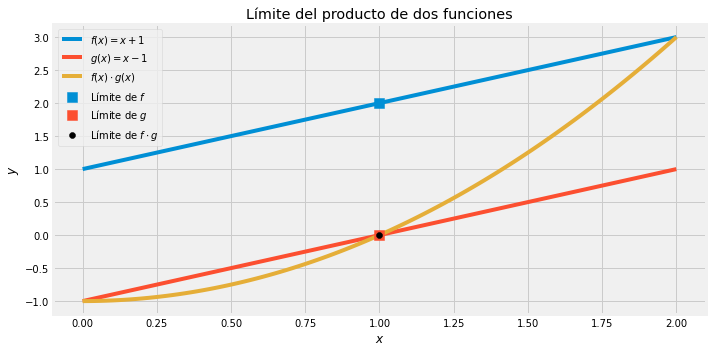

In [ ]:
#Definimos la función f(x) y g(x)
f = lambda x: x + 1
g = lambda x: x - 1

#Definimos el dominio y el codominio de la función f(x) y g(x)
x = np.linspace(0,2,100)  # Dominio
yf = f(x)                 # Codominio de f
yg = g(x)                 # Codominio de g

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':'Límite del producto de dos funciones', 
        'xlabel':'$x$',
        'ylabel':'$y$'}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=yf, par={'label':'$f(x)=x+1$'})                #Gráfica de la función f(x)
graf.plot(x=x, y=yg, par={'label':'$g(x)=x-1$'})                #Gráfica de la función g(x)
graf.plot(x=x, y=yf*yg, par={'label':'$f(x) \cdot g(x)$'})      #Gráfica de la función f(x)*g(x)

x0 = 1.0 # Modifique este valor entre 0 y 2

graf.scatter(x=x0, y=f(x0),         #Límite de f(x)
             par={'label':'Límite de $f$', 's':100, 'marker':'s','color':'C0', 'zorder':5})

graf.scatter(x=x0, y=g(x0),         #Límite de g(x)
             par={'label':'Límite de $g$', 's':100, 'marker':'s','color':'C1', 'zorder':5})

graf.scatter(x=x0, y=f(x0)*g(x0),   #Límite de f(x)*g(x)
             par={'label':'Límite de $f \cdot g$','color':'black', 'zorder':5})
graf.legend()
graf.show()

¿Qué pasa si modifica el valor de `x0` en el código anterior?

### Ejemplo 3

Calcular el límite de $f(x)$ cuando $x$ tiende a $4$ para $f(x) = \sqrt{2x + 1}$.


Primero definimos $f_0(x) = 2x+1$ y calculamos: 

$$ \lim_{x \to 4} f_0(x) = \lim_{x \to 4}  (2x + 1) = 9$$

Ahora podemos usar la siguiente propiedad: 

$$ \lim_{x \to a} \sqrt{2x + 1} = \lim_{x \to a} \sqrt{f_0(x)} = \sqrt{\lim_{x \to a} f_0(x)}$$

Entonces el límite que se busca es:

$$ \sqrt{\lim_{x \to a} f_0(x)} = \sqrt{9} = 3 $$ 

Verifique lo anterior usando la función `limit` como en el ejemplo 1.

Veamos lo anterior gráficamente:

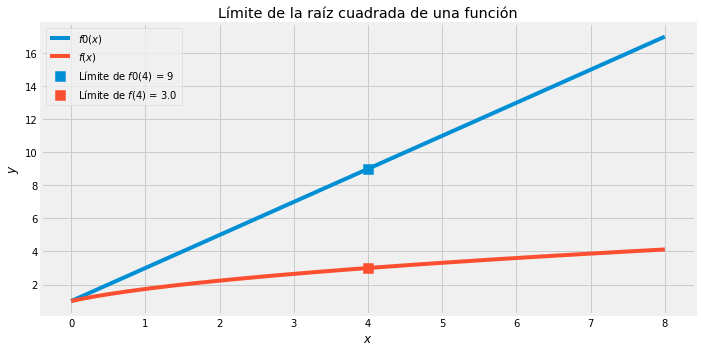

In [ ]:
#Definimos la función f(x) y f0(x)
f0 = lambda x: 2 * x + 1
f = lambda x: np.sqrt(f0(x))

#Definimos el dominio y el codominio de la función f(x)
x = np.linspace(0,8,100)  # Dominio
y0 = f0(x)                # Codominio de f0
yf = f(x)                 # Codominio de f

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':'Límite de la raíz cuadrada de una función', 
        'xlabel':'$x$',
        'ylabel':'$y$'}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=y0, par={'label':'$f0(x)$'})           #Gráfica de la función f0(x)
graf.plot(x=x, y=yf, par={'label':'$f(x)$'})            #Gráfica de la función f(x)

x0 = 4

graf.scatter(x=x0, y=f0(x0),        #Límite de f0(x)
             par={'label':'Límite de $f0({})$ = {}'.format(x0,f0(x0)), 's':100, 'marker':'s','color':'C0', 'zorder':5})

graf.scatter(x=x0, y=f(x0),         #Límite de f(x)
             par={'label':'Límite de $f({})$ = {}'.format(x0,f(x0)), 's':100, 'marker':'s','color':'C1', 'zorder':5})

graf.legend()
graf.show()

### Ejemplo 4

¿Qué propiedad se puede usar para calcular el límite de $f(x) = (x + 1)^2$ cuando $x$ tiende a $2$?

Calcule el límite y verifique usando la función `limit` como en el ejemplo 1.

La gráfica siguiente ilustra el uso de la propiedad respectiva para calcular este límite:

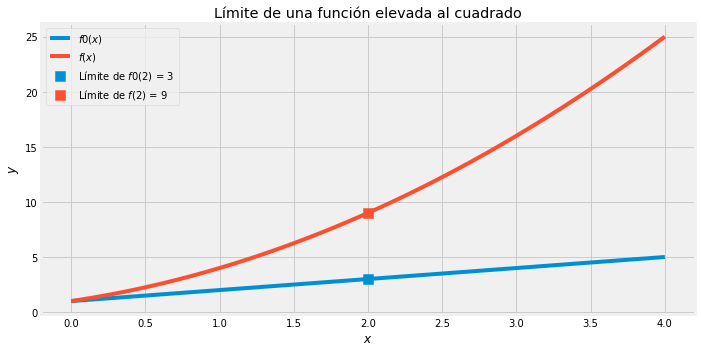

In [ ]:
#Definimos la función f(x) y f0(x)
f0 = lambda x: x + 1
f = lambda x: f0(x)**2

#Definimos el dominio y el codominio de la función f(x)
x = np.linspace(0,4,100)  # Dominio
y0 = f0(x)                # Codominio de f0
yf = f(x)                 # Codominio de f

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':'Límite de una función elevada al cuadrado', 
        'xlabel':'$x$',
        'ylabel':'$y$'}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=y0, par={'label':'$f0(x)$'})            #Gráfica de la función f0(x)
graf.plot(x=x, y=yf, par={'label':'$f(x)$'})             #Gráfica de la función f(x)

x0 = 2

graf.scatter(x=x0, y=f0(x0),            #Límite de f0(x)
             par={'label':'Límite de $f0({})$ = {}'.format(x0,f0(x0)), 's':100, 'marker':'s','color':'C0', 'zorder':5})

graf.scatter(x=x0, y=f(x0),             #Límite de f(x)
             par={'label':'Límite de $f({})$ = {}'.format(x0,f(x0)), 's':100, 'marker':'s','color':'C1', 'zorder':5})

graf.legend()
graf.show()

## Límites que tienden al infinito

¿Cómo conocemos el límite de una funcíón cuando sus variables tienden a infinito?

En este caso la manera de resolverlo resulta complicado, debido a que al evaluar una función en infinito el resultado es una función indefinida. A pesar de eso, es posible conocer el valor del límite de la función cuando los valores tienden a infinito.

### Ejemplo 5
Obtener el límite de la función $f(x)= \frac{1}{x}$ cuando $x \rightarrow \infty$.

Veamos la gráfica de la función $f(x)$:

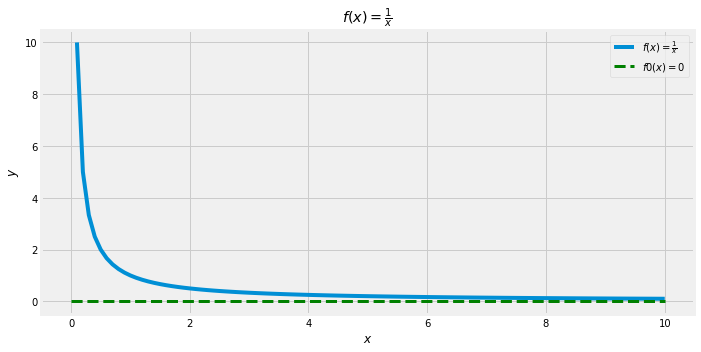

In [ ]:
#Definimos la función f(x)
f = lambda x: 1/x

#Definimos el dominio y el codominio de la función f(x)
x = np.linspace(0.1, 10, 100)       #Dominio
y = f(x)                            #Codominio

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r'$f(x)=\frac{1}{x}$', 
        'xlabel':'$x$',
        'ylabel':'$y$'}]


graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x), par={'label': r'$f(x)= \frac{1}{x}$','zorder':5})  #Gráfica de la función f(x)
graf.plot(x=[0,10], y=[0,0], par={'label':'$f0(x)=0$', 'ls':'--', 'color':'green', 'lw':3, 'zorder':5})
graf.legend()
graf.show()

Como se puede observar en la gráfica de la función $f(x)=\frac{1}{x}$ mientras más crece el valor de $x$, su límite se acerca al valor 0. En este caso, efectivamente el $\displaystyle \lim_{x \to \infty} \frac{1}{x} = 0$. 

Se puede verificar como sigue:

In [ ]:
#Calculando límite con Python
#Denotamos x como una variable
x = Symbol('x') 
#Definimos la función f(x)
y = 1/x 
#Calculamos el límite de f(x)=y cuando x tiende a infinito
limit(y, x, oo)

0

## Limites infinitos
Un límite infinito es aquel que mientras más se acerque al punto x=a el valor del límite será  $\pm \infty$ por lo que el valor de la función en dicho punto será infinito.

### Ejemplo 6

Por ejemplo, para la función $f(x)= \frac{1}{x^2}$ buscaremos el límite cuando $x$ tiende a cero, es decir;
$$\lim_{x \to 0} \frac{1}{x^2}$$


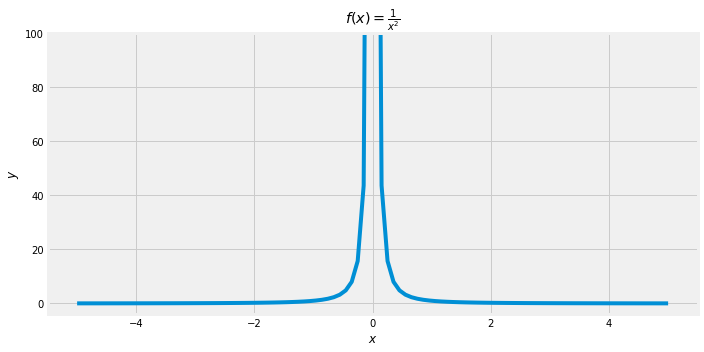

In [ ]:
#Definimos la función f(x)
f = lambda x: 1/x**2

#Definimos el dominio y el codominio de la función f(x)
x = np.linspace(-5, 5, 100)         #Dominio
y = f(x)                            #Codominio


#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"$f(x)= \frac{1}{x^2}$", 
        'xlabel':'$x$',
        'ylabel':'$y$',
       'ylim':(-4,100)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x))              #Gráfica de la función f(x)
graf.show()


Observamos en la gráfica anterior que cuando $x$ se acerca al cero, por la izquierda y por la derecha, el valor de la función crece a gran velocidad, por lo que mientras más nos acerquemos a cero el valor de la funcón será más grande y se obtendrá que el límite de esta función es infinito.

 Se puede verificar que este límite es $+ \infty$ utilizando la función `limit`.

In [ ]:
#Calculando límite con Python
#Denotamos x como una variable
x = Symbol('x') 
#Definimos la función f(x)
y = 1/x**2 
#Calculamos el límite de f(x)=y cuando x tiende a infinito
limit(y, x, 0)


oo

### Ejemplo 7

Encontrar los siguientes límites:
- $f(x) = x^2$ cuando x tiende a 4.
- $f(x) = x^2 + 8x + 31$ cuando x tiende a 3.
- $f(x) = x^2 - x + 2$ cuando x tiende a 2.

Use la función `limit` para verificar los límites.
Veamos las siguientes gráficas:

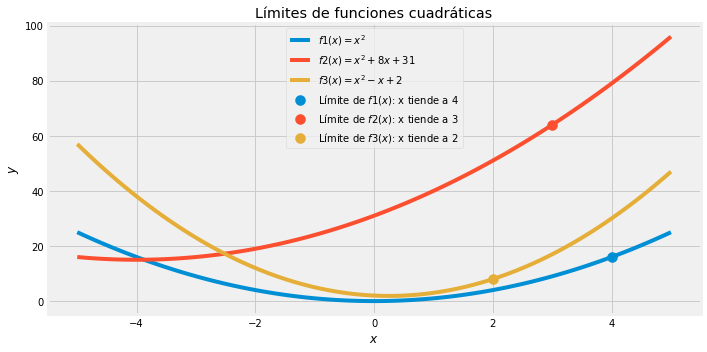

In [ ]:
#Definimos la función f1(x), f2(x) y f3(x)
f1 = lambda x: x**2
f2 = lambda x: x**2 + 8*x + 31
f3 = lambda x: 2*x**2 - x + 2

#Definimos el dominio de la función f(x)
x = np.linspace(-5, 5, 100)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"Límites de funciones cuadráticas", 
        'xlabel':'$x$',
        'ylabel':'$y$'}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f1(x), par={'label':'$f1(x) = x^2$'})               #Gráfica de la función f1(x)
graf.plot(x=x, y=f2(x), par={'label':'$f2(x) = x^2 + 8x + 31$'})     #Gráfica de la función f2(x)
graf.plot(x=x, y=f3(x), par={'label':'$f3(x) = x^2 - x + 2$'})       #Gráfica de la función f3(x)

x1 = 4
x2 = 3
x3 = 2
graf.scatter(x=x1, y=f1(x1),        #Límite de f1(x)
             par={'label':'Límite de $f1(x)$: x tiende a 4', 's':100, 'color':'C0', 'zorder':10})
graf.scatter(x=x2, y=f2(x2),        #Límite de f2(x)
             par={'label':'Límite de $f2(x)$: x tiende a 3', 's':100, 'color':'C1', 'zorder':10})
graf.scatter(x=x3, y=f3(x3),        #Límite de f3(x)
             par={'label':'Límite de $f3(x)$: x tiende a 2', 's':100, 'color':'C2', 'zorder':10})

graf.legend()
graf.show()


### Ejemplo 8

Para la función $f(x)= x^{\frac{1}{x}}$ queremos obtener el siguiente límite:
$$\lim_{x \to \infty} x^{\frac{1}{x}} $$

**Hint**: ¿Qué pasa con la función $g(x) = \frac{1}{x}$ cuando $x \to \infty$?

Veámos esto gráficamente:

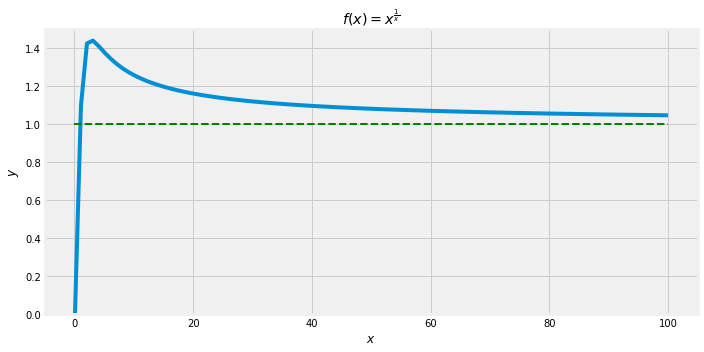

In [ ]:
#Definimos la función f(x)
f = lambda x: x**(1/x)

#Definimos el dominio de la función f(x)
x = np.linspace(0.1, 100, 100)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"$f(x)=x^{\frac{1}{x}}$", 
        'xlabel':'$x$',
        'ylabel':'$y$',
       'ylim':(0,1.5)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x))              #Gráfica de la función f1(x)
graf.plot(x=[0,100], y=[1,1], par={'ls':'--', 'color':'green', 'lw':2})
graf.show()

Observamos que conforme crece el valor de $x$, el valor de la función se acerca cada vez más a $1$. Usando la función `limit` vemos lo siguiente:

In [ ]:
#Calculando límite con Python
#Denotamos x como una variable
x = Symbol('x') 
#Definimos la función f(x)
y = x**(1/x) 
#Calculamos el límite de f(x)=y cuando x tiende a infinito
limit(y, x, oo)


1

### Ejemplo 9

Para la función $f(x)= \left( 1+\frac{1}{x} \right)^x$ queremos obtener el siguiente límite:

$$\lim_{x \to \infty} \left( 1+\frac{1}{x} \right)^x $$

Veámos la gráfica:

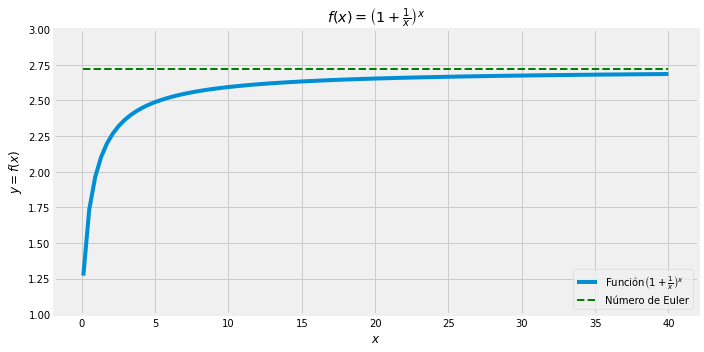

In [ ]:
#Definimos la función f(x)
f = lambda x : (1+(1/x))**x
e = lambda x : np.ones(len(x)) * math.e

#Definimos el dominio de la función f(x)
x = np.linspace(0.1, 40, num=100)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"$f(x)=\left( 1+\frac{1}{x} \right)^x$", 
        'xlabel':'$x$',
        'ylabel':'$y=f(x)$',
       'ylim':(1,3)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x), par={'label':r"Función$\left( 1+\frac{1}{x} \right)^x$"})    #Gráfica de la función f1(x)
graf.plot(x=x, y=e(x), par={'label':"Número de Euler",'color':'C1', 'ls':'--', 'lw':'2', 'color':'green'})
graf.legend()
graf.show()

Es posible observar que conforme $x \to \infty$ el valor de la función tiende a un número muy particular que está entre 2.5 y 2.75.

Pruebe que este límite es: 
$$\lim_{x \to \infty} \left( 1+\frac{1}{x} \right)^x $$

**Hint**: aplique el logaritmo natural a la función, utilice las identidad de logaritmo de una potencia, luego aplique una de las reglas de los límites.

Usando la función `limit` vemos lo siguiente:

In [ ]:
#Calculando límite con Python
#Denotamos x como una variable
x = Symbol('x') 
#Definimos la función f(x)
y=(1+(1/x))**x 
#Calculamos el límite de f(x)=y cuando x tiende a infinito
limit(y, x, oo)

E

## Algunas aplicaciones

### Tránsito vehícular exponencial


Usando datos de varios años consecutivos, el gobierno de Ciudad del Carmen encontró un modelo del tránsito de vehículos en la zona centro de la ciudad durante las horas pico. Este modelo se expresa como sigue:

$$
f(x) = a e^{bx - c}
$$

donde $a = 3.0$, $b = 2.5$ y $c = 17$. La gráfica de este modelo es la siguiente:

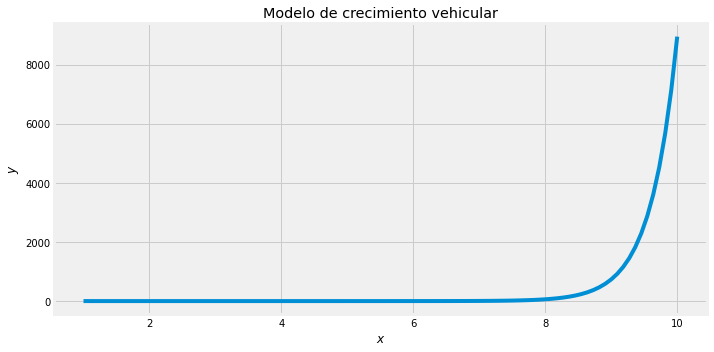

In [ ]:
#Definimos parámetros
a = 3.0
b = 2.5
c = 17

#Definimos la función f(x)
f = lambda x: a * np.exp(b*x - c)

#Definimos el dominio de la función f(x)
x = np.linspace(1, 10, 100)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"Modelo de crecimiento vehicular", 
        'xlabel':'$x$',
        'ylabel':'$y$'}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=f(x))       #Gráfica de la función f1(x)
graf.show()

Como puede obsrevarse, a partir del octavo año el incremento del tránsito fue exponencial. Lo anterior se debe a que justo en ese año se introdujo en el mercado una nueva marca de autos que tuvo un gran éxito de ventas. 

El gobierno esta preocupado debido a la sobrepoblación vehicular y le gustaría conocer el crecimiento del parque vehicular para los años $9, 10$ y $11$ , de este modo podría establecer planes para evitar el congestionamiento en grandes avenidas.

Se puede calcular el límite cuando $x$ tiende a $9, 10,$ y $11$. El siguiente código hace el cálculo y la gráfica de este comportamiento.

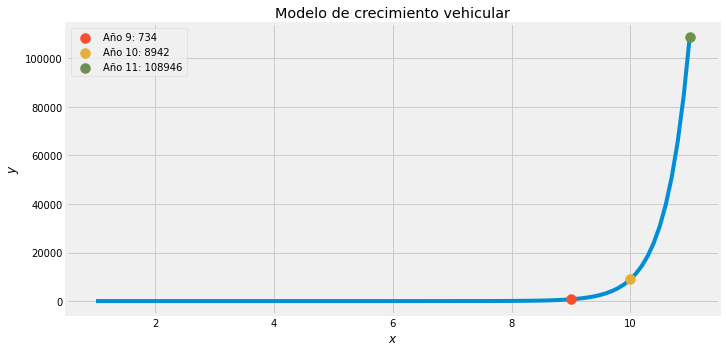

In [ ]:
t = Symbol('x') 
vehiculos = (a * math.e ** (b * t - c)) 

#Calculo de límites para los años 9, 10 y 11
a9 = limit(vehiculos, t, 9)
a10 = limit(vehiculos, t, 10)
a11 = limit(vehiculos, t, 11)

#Gráfica de la función con límites
graf = vis.planoCartesiano(par=par)

x = np.linspace(1, 11, 100)
graf.plot(x=x, y=f(x))          #Gráfica de la función f(x)
graf.scatter(x=9, y=a9,         #Límite de f(x) año 10
            par={'color':'C1', 'zorder':5, 's':100, 'label':'Año 9: {}'.format(int(a9))})
graf.scatter(x=10, y=a10,       #Límite de f(x) año 10
            par={'color':'C2', 'zorder':5, 's':100, 'label':'Año 10: {}'.format(int(a10))})
graf.scatter(x=11, y=a11,       #Límite de f(x) año 11
            par={'color':'C3', 'zorder':5, 's':100, 'label':'Año 11: {}'.format(int(a11))})
graf.legend()
graf.show()

Se observa que si no se pone una solución a este crecimiento, habrá un gran problema en el año 11, 108946 autos intentando circular al mismo tiempo en la zona centro. El gobierno deberá diseñar alguna estrategia para promover el uso de la bicicleta, del transporte público y/o descentralizar muchas de las actividades productivas que se llevan a cabo en el centro de la ciudad.

### Ritmo cardíaco de extraterrestres

El departamento de investigación clínica de la NASA tiene un nuevo expediente secreto en el cual han descubierto un organismo vivo encontrado en uno de los satélites que están en órbita en el espacio exterior. Se analizaron los organismos y se concluyó que tienen características similares a los seres humanos, por ejemplo, se detecto el ritmo cardiaco del organismo. Durante una crisis, el organismo tuvo un paro cardiaco y en los esfuerzos por estabilizarlo utilizaron dos medicamentos no probados anteriormente, lo único que se sabía sobre estos medicamentos es que el ritmo cardiaco subiría según el comportamiento de las siguientes funciones:

$$M_1 = \big|\sin(x) \frac{x}{8}\big|$$
$$M_2 = \big|\cos(x) \frac{x}{8}\big|$$

La reacción que ambos medicamentos tendrían en el organismo es la siguiente:

$$M = \big|\sin(x) \frac{x}{8} - \cos(x) \frac{x}{8}\big|$$

Esta función proporcioná el tiempo en minutos que se deberán administrar los medicamientos en función de $x$, que representa los latidos por minuto que se desean obtener.

A los médicos les interesa saber el tiempo que tardará el organismo en recuperar el ritmo cardiaco normal de 97 latidos por minuto para retirar el medicamento, pues en caso de que tarde más de 15 minutos es muy probable que el resto de los órganos colapsen.

La gráfica del comportamiento del ritmo cardiaco, para $x \in [0,10]$ latidos por minuto  es: 

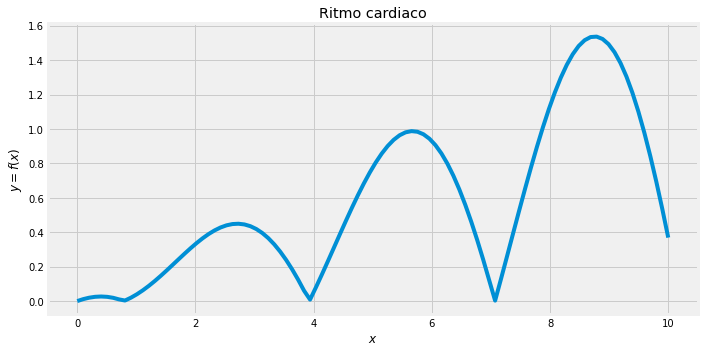

In [ ]:
#Definimos la función Medicamento
M = lambda x: np.abs(np.sin(x)* (x/8)- np.cos(x)*(x/8))

#Definimos el dominio de la función f(x)
x = np.linspace(0, 10, 100)

#Graficamos especificando el titulo y nombre de los ejes
par = [{'title':r"Ritmo cardiaco", 
        'xlabel':'$x$',
        'ylabel':'$y=f(x)$'}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=x, y=M(x))          #Visualizamos ritmo cardiaco
graf.show()

Para conocer los minutos que tardará el organismo en tener $97$ latidos por minuto debemos calcular el límite de la función cuando $x$ tiende a $97$ es decir:

$$\lim_{x \to 97} \big|\sin(x) \frac{x}{8} - \cos(x) \frac{x}{8}\big| $$

Entonces diremos que el resultado de dicho límite serán los minutos que el organismo tardará en obtener un ritmo normal.

Calcule el límite y responda si el organismo vive o muere. Haga también el gráfico para $x \in [0,100]$ y marque sobre la gráfica el valor obtenido para $x=97$.

#Evalúa tus conocimientos

Si deseas contestar un breve cuestionario en el que podrás evaluar un poco del conocimiento aquirido en este notebook da clic [aquí.](https://forms.gle/fjdUdejVcJd8iSFx5)


## Referencias
Para profundizar en los temas tratados en el presente documento se pueden consultar las siguientes fuentes.



*  	Larson, R., Edwards, B. H., Escutia, J. I., Fernández, Á. H., Cázáres, G. N., & Chávez, N. A. M. (2010). Cálculo 1: De una variable. McGraw-Hill Interamericana.
*   Zill, D., & Wright, W. (2011). Matemáticas 1: Cálculo diferencial. McGraw-Hill Interamericana de España S.L.
*   Salinas Martínez, N. P., Alanís Rodríguez, J. A., Garza García, J. L., Pulido Ríos, R., Santos Leal, F. X., & Escobedo Mirales, J. C. (2012). Cálculo aplicado: Competencias matemáticas a través de contextos. Cengage Learning.

